In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


use Random forest to prepare a model on Fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [106]:
fraud_check = pd.read_csv('D:\\Data Science-Ayesha\\Fraud_check (2).csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [107]:
fraud_check.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [108]:
fraud_check.columns=['undergrad','marital status', 'taxable.income', ' city.population','work.experience','urban']

In [109]:
fraud_check

,undergrad,marital status,taxable.income,city.population,work.experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [110]:
fraud_check.isnull().sum()

undergrad           0
marital status      0
taxable.income      0
 city.population    0
work.experience     0
urban               0
dtype: int64

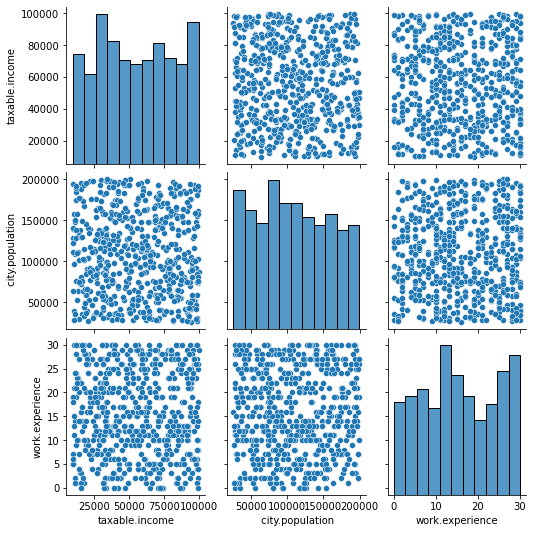

In [111]:
import seaborn as sns   
sns.pairplot(fraud_check)

In [112]:
#bins for taxable_income to categorical
cut_labels = ['Risky','Good']
cut_bins = [0,30000,98965]
fraud_check['taxable.income']=pd.cut(fraud_check['taxable.income'],bins=cut_bins,labels = cut_labels)

In [113]:
fraud_chec=pd.get_dummies(fraud_check.drop(columns=['taxable.income']))


In [114]:
fraud_final=pd.concat([fraud_chec,fraud_check['taxable.income']],axis=1)

In [115]:
colnames = list(fraud_final.columns)
colnames

[' city.population',
 'work.experience',
 'undergrad_NO',
 'undergrad_YES',
 'marital status_Divorced',
 'marital status_Married',
 'marital status_Single',
 'urban_NO',
 'urban_YES',
 'taxable.income']

In [120]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for column_name in colnames:
    if fraud_final[column_name].dtype == object:
        fraud_final[column_name] = le.fit_transform(fraud_final[column_name])
    else:
        pass

In [121]:
#splitting the data into features and labels
features = fraud_final.iloc[:,0:5]
labels = fraud_final.iloc[:,5]

In [201]:
#collecting the column names
colnames1= list(colnames)
predictors=colnames1[0:5]
target = colnames1[5]
predictors

[' city.population',
 'work.experience',
 'undergrad_NO',
 'undergrad_YES',
 'marital status_Divorced']

In [202]:
#splitting the data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,stratify=labels) 


In [203]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [204]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1039264007),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=108442131),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=408687683),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=834552179),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1233892713),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=812571018),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=947094588),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=580366830),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
            

In [205]:
model.classes_

array([0, 1], dtype=uint8)

In [206]:
model.n_features_

5

In [207]:
model.n_classes_

2

In [208]:
model.oob_score_

0.6708333333333333

In [209]:
#prediction on train data
prediction = model.predict(x_train)

In [210]:
#accuracy
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.9895833333333334

In [211]:
np.mean(prediction == y_train)

0.9895833333333334

In [212]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [213]:
#prediction on test data
pred_test = model.predict(x_test)

In [214]:
#accuracy
acc_test= accuracy_score(y_test,pred_test)
acc_test

0.625

In [196]:
#in random forest ploting a decision tree present in random forest
from sklearn.tree import  export_graphviz
!pip install pydotplus

In [140]:
import pydotplus

In [145]:
!pip install six 

In [147]:
from six import StringIO

In [241]:
from sklearn.tree import export_graphviz

In [242]:
tree = model.estimators_[5]
tree


DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=812571018)

In [244]:
dot_data = StringIO()

In [245]:

export_graphviz(tree,out_file =dot_data , filled = False,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [246]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [255]:
graph

#problem 2
About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [12]:
import pandas as pd
company =pd.read_csv('D:\\Data science-Ayesha\\Company_Data (2).csv')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [14]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [16]:
company.columns
company.columns=['sales','comprice','income', 'advertising','population','price','shelveloc','age','education','urban','us']
company.columns

Index(['sales', 'comprice', 'income', 'advertising', 'population', 'price',
       'shelveloc', 'age', 'education', 'urban', 'us'],
      dtype='object')

In [17]:
company

,sales,comprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [18]:
company.sales.median()

7.49

In [19]:
cut_labels = ['Low','Medium','High']
cut_bins= [-1,5.66,12,17]
company['sales']=pd.cut(company['sales'],labels=cut_labels, bins=cut_bins)
company.pop('sales')

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [20]:
label_encoder = preprocessing.LabelEncoder()
company['shelveloc']=label_encoder.fit_transform(company['shelveloc'])
company['urban']=label_encoder.fit_transform(company['urban'])
company['us']=label_encoder.fit_transform(company['us'])

In [21]:
array=company.values
X=array[:,0:9]
Y=array[:,9]
kfold= KFold(n_splits=5,random_state=7)

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [22]:
model= RandomForestClassifier(n_estimators=100,max_features=3)
results= cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.905
